## Hands-On Material 4
- `Dataset 1` : wine (from scikit-learn)
- `Dataset 2` : digits (from scikit-learn)
- `Dataset 3` : waves (from mglearn)
- `Dataset 4` : make_circles (from scikit-learn)
 

In [3]:
from sklearn.datasets import load_wine
import pandas as pd

# Memuat dataset Wine
wine = load_wine()

# Membuat DataFrame pandas
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

### Entropy

In [ ]:
from collections import Counter
import math

def calculate_entropy(data):
    total_elements = len(data)
    class_counts = Counter(data)
    entropy = 0.0

    for count in class_counts.values():
        probability = count / total_elements
        entropy -= probability * math.log2(probability)
    return entropy

# Menerapkan fungsi ke target dataset Wine
target_entropy_wine = calculate_entropy(df_wine['target'])
print(f'Entropy dari target (kelas) Wine: {target_entropy_wine}')

Entropy dari target (kelas) Wine: 1.5668222768551812


### Classification with C4.5

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Memisahkan fitur (X) dan target (y) untuk dataset Wine
X_wine = df_wine.drop(columns=['target'])
y_wine = df_wine['target']

# Membagi data latih dan data uji
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Membuat dan melatih model
clf_wine = DecisionTreeClassifier(criterion='entropy')
clf_wine.fit(X_train_wine, y_train_wine)

# Memprediksi dan menghitung akurasi
y_pred_wine = clf_wine.predict(X_test_wine)
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)

print(f'Akurasi model Decision Tree (Wine): {accuracy_wine}')

Akurasi model Decision Tree (Wine): 0.8148148148148148


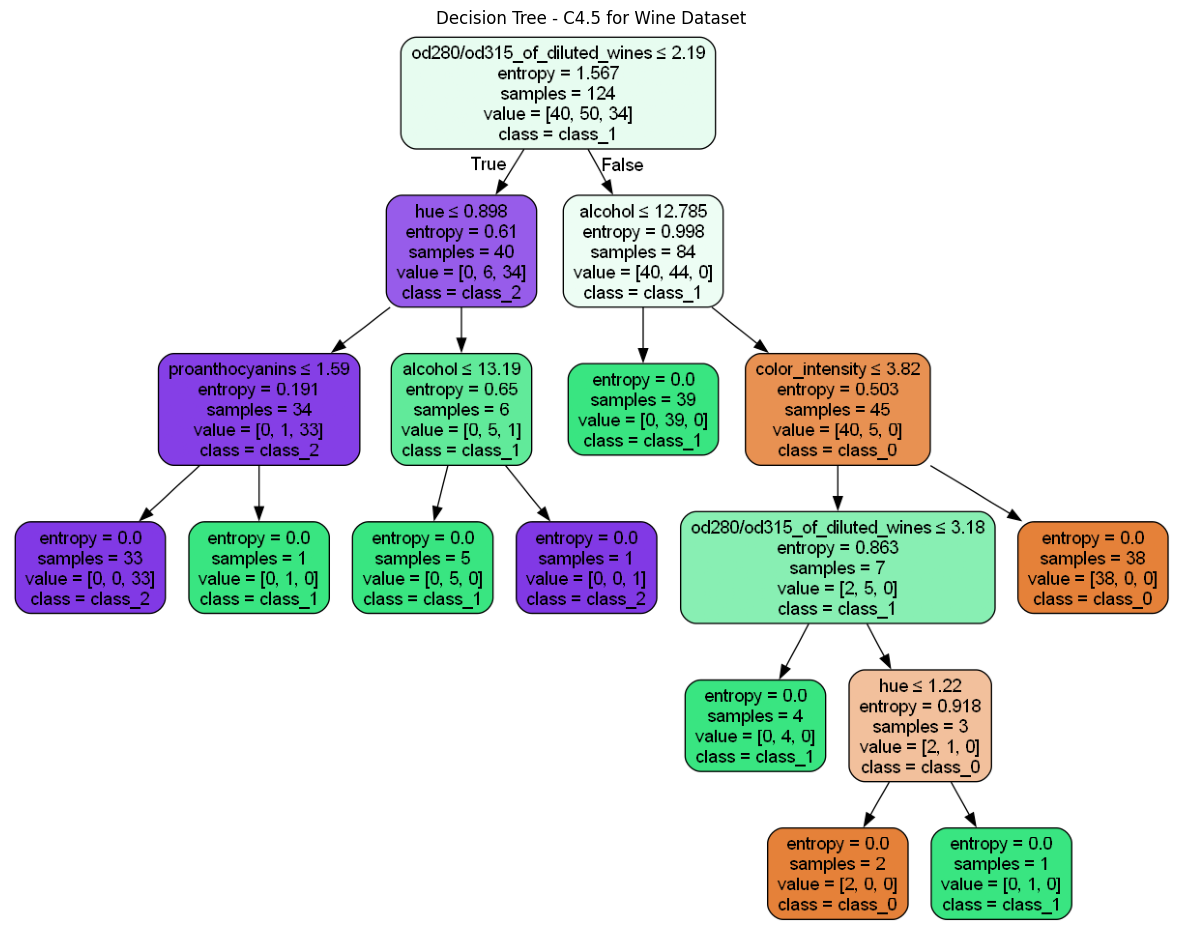

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np 

# Plot Decision Tree
dot_data_wine = export_graphviz(clf_wine, out_file=None,
                           feature_names=wine.feature_names,
                           class_names=wine.target_names,
                           filled=True, rounded=True,
                           special_characters=True)

# Simpan dan tampilkan gambar
graph_wine = graphviz.Source(dot_data_wine)
graph_wine.render("wine_decision_tree", format='png')

# Menampilkan pohon
graph_image_wine = plt.imread("wine_decision_tree.png")
plt.figure(figsize=(15, 15)) 
plt.imshow(graph_image_wine)
plt.axis('off')
plt.title('Decision Tree - C4.5 for Wine Dataset') 
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Memuat dataset Digits (pengganti load_breast_cancer())
digits = load_digits()

# Variabel baru: X_train_digits, X_test_digits, y_train_digits, y_test_digits
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(
    digits.data, digits.target, stratify=digits.target, random_state=42
)

# Variabel baru: tree_digits_full
tree_digits_full = DecisionTreeClassifier(random_state=0)
tree_digits_full.fit(X_train_digits, y_train_digits)

print("Akurasi (Digits, tanpa pruning) set latih: {:.3f}".format(tree_digits_full.score(X_train_digits, y_train_digits)))
print("Akurasi (Digits, tanpa pruning) set uji: {:.3f}".format(tree_digits_full.score(X_test_digits, y_test_digits)))


Akurasi (Digits, tanpa pruning) set latih: 1.000
Akurasi (Digits, tanpa pruning) set uji: 0.820


In [18]:
tree_digits_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_digits_pruned.fit(X_train_digits, y_train_digits)

print("Akurasi (Digits, max_depth=4) set latih: {:.3f}".format(tree_digits_pruned.score(X_train_digits, y_train_digits)))
print("Akurasi (Digits, max_depth=4) set uji: {:.3f}".format(tree_digits_pruned.score(X_test_digits, y_test_digits)))


Akurasi (Digits, max_depth=4) set latih: 0.599
Akurasi (Digits, max_depth=4) set uji: 0.576


In [19]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_digits_pruned, out_file="tree_digits.dot", 
                class_names=digits.target_names.astype(str), # Target names adalah angka 0-9
                feature_names=digits.feature_names, 
                impurity=False, filled=True)

with open("tree_digits.dot") as f:
    dot_graph_digits = f.read()


print("tree_digits.dot file created.")

tree_digits.dot file created.


Feature importances (Digits):
[0.         0.         0.         0.         0.         0.12592217
 0.00861826 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00652976 0.18433168 0.         0.
 0.         0.         0.         0.         0.093024   0.
 0.         0.         0.         0.10847939 0.         0.00492768
 0.15592236 0.         0.         0.         0.         0.
 0.13964897 0.         0.         0.         0.         0.
 0.         0.         0.00343666 0.         0.         0.
 0.04753021 0.         0.         0.         0.         0.
 0.12162886 0.         0.         0.        ]


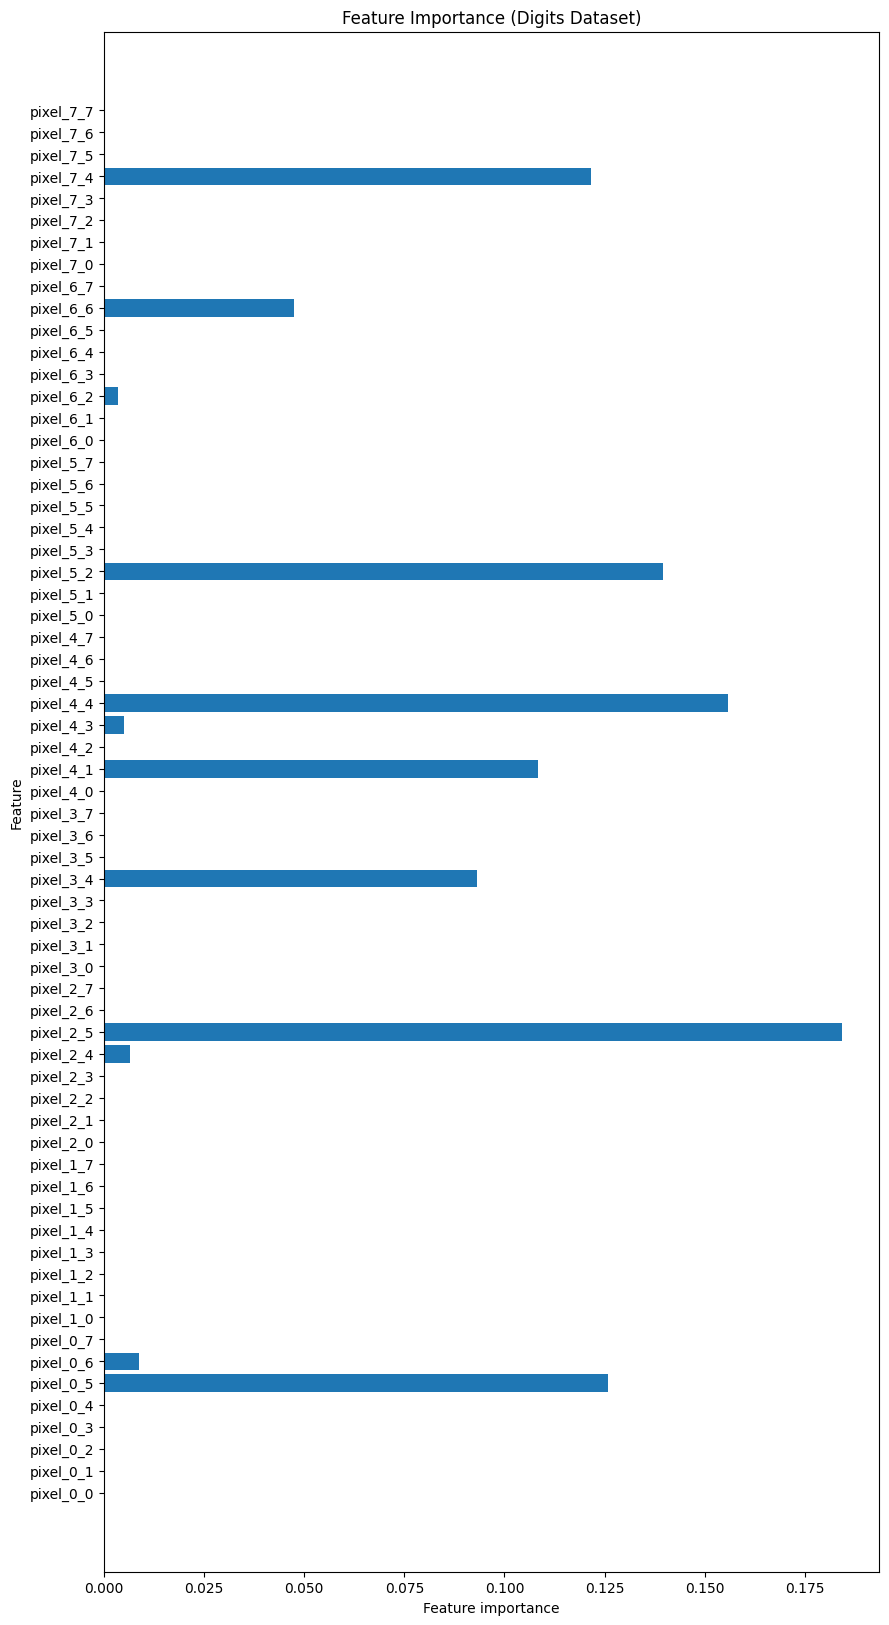

In [20]:
import matplotlib.pyplot as plt
import numpy as np

print("Feature importances (Digits):\n{}".format(tree_digits_pruned.feature_importances_))

def plot_feature_importances_digits(model):
    n_features = digits.data.shape[1]
    plt.figure(figsize=(10, 20)) # Disesuaikan untuk 64 fitur
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), digits.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance (Digits Dataset)")

plot_feature_importances_digits(tree_digits_pruned)
plt.show()


Akurasi (Random Forest - Digits) set latih: 1.000
Akurasi (Random Forest - Digits) set uji: 0.978


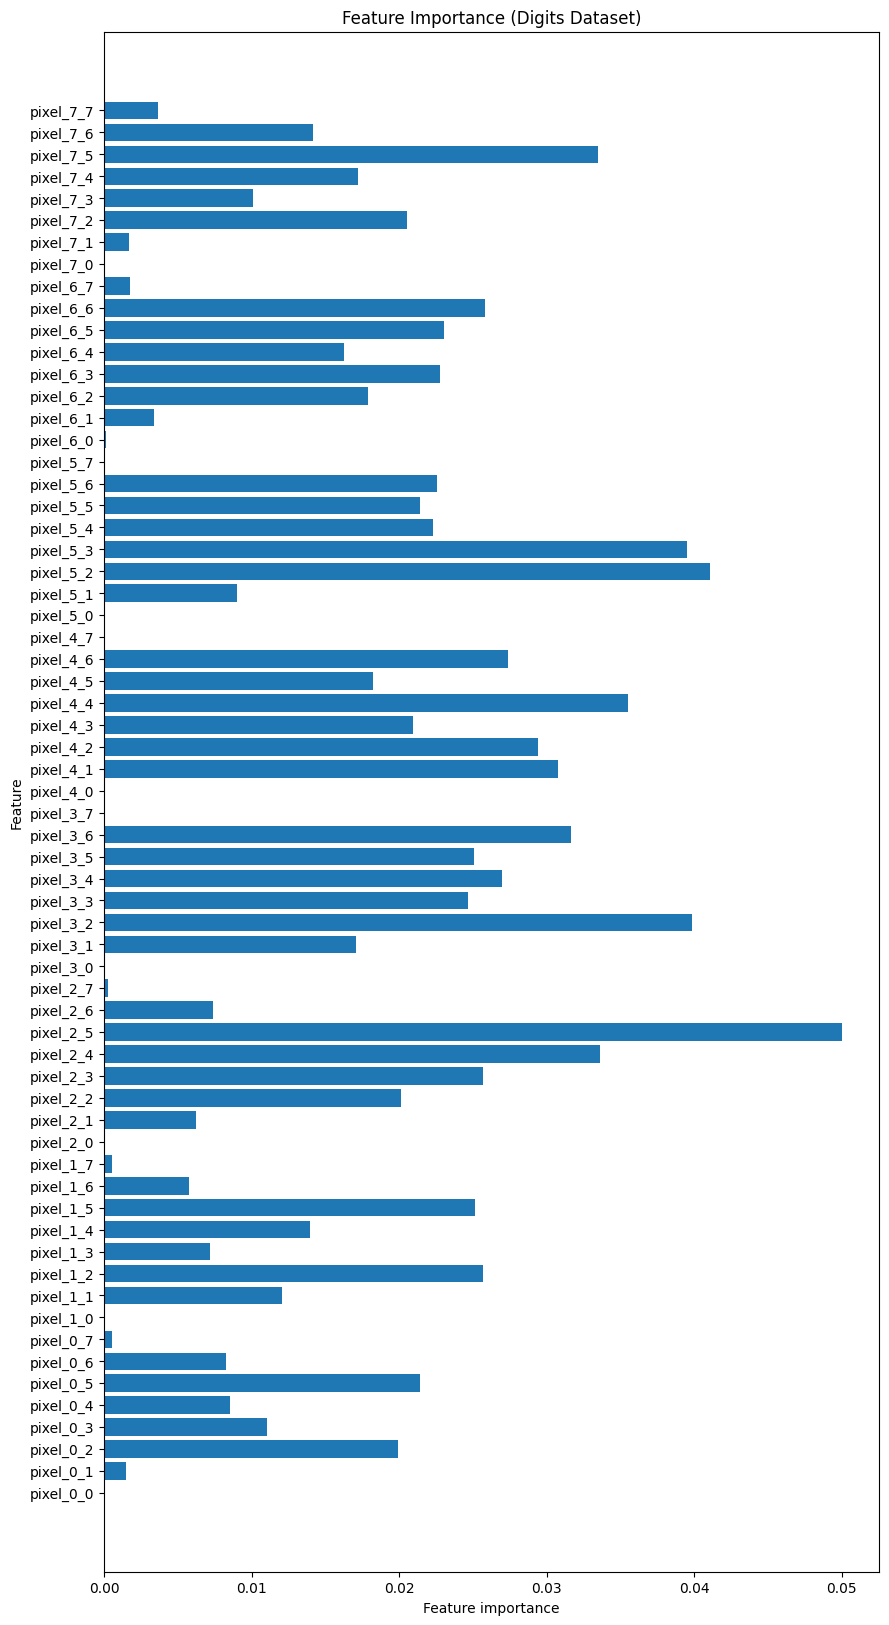

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_digits = RandomForestClassifier(n_estimators=100, random_state=0)
forest_digits.fit(X_train_digits, y_train_digits) # Menggunakan data digits

print("\nAkurasi (Random Forest - Digits) set latih: {:.3f}".format(forest_digits.score(X_train_digits, y_train_digits)))
print("Akurasi (Random Forest - Digits) set uji: {:.3f}".format(forest_digits.score(X_test_digits, y_test_digits)))

# Plot feature importance untuk Random Forest
plot_feature_importances_digits(forest_digits)
plt.show()

In [22]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 1. Muat dataset (pengganti ram_prices)
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=100)

# 2. Latih model Regresi (DecisionTreeRegressor dan LinearRegression)
tree_wave = DecisionTreeRegressor(min_samples_split=3).fit(X_wave, y_wave)
lr_wave = LinearRegression().fit(X_wave, y_wave)

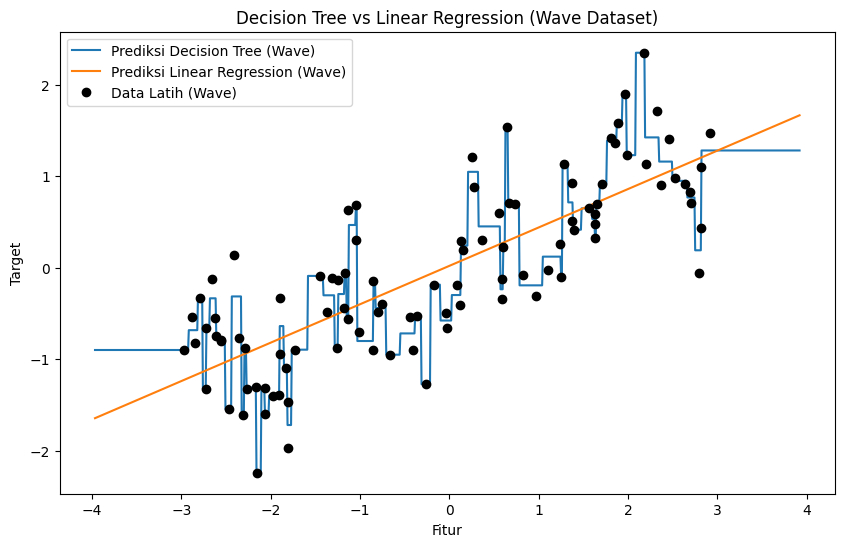

In [23]:
# 3. Siapkan data untuk plot prediksi (garis)
line_wave = np.linspace(np.min(X_wave) - 1, np.max(X_wave) + 1, 1000).reshape(-1, 1)

# 4. Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(line_wave, tree_wave.predict(line_wave), label="Prediksi Decision Tree (Wave)")
plt.plot(line_wave, lr_wave.predict(line_wave), label="Prediksi Linear Regression (Wave)")

# Plot data latih asli
plt.plot(X_wave[:, 0], y_wave, 'o', c='k', label="Data Latih (Wave)")
plt.ylabel("Target")
plt.xlabel("Fitur")
plt.legend()
plt.title("Decision Tree vs Linear Regression (Wave Dataset)")
plt.show()

### Analyzing random forest

In [24]:
from sklearn.datasets import make_circles
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt

# 1. Muat dataset (pengganti make_moons)
X_circles, y_circles = make_circles(n_samples=100, noise=0.25, random_state=3, factor=0.5)

# 2. Split data
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(
    X_circles, y_circles, stratify=y_circles, random_state=42
)

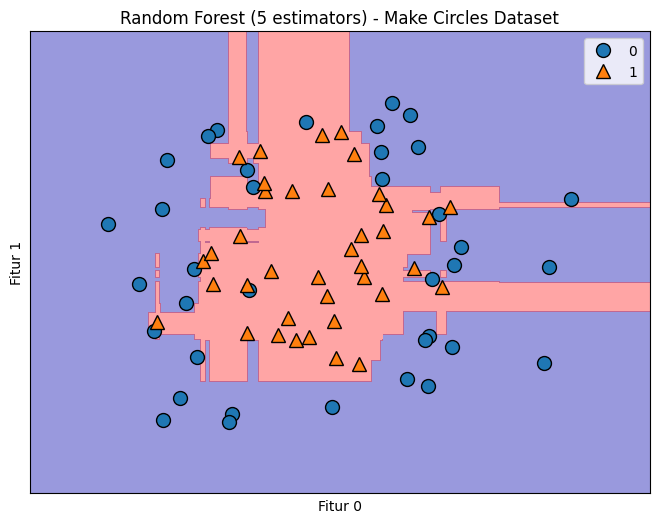

In [ ]:
# 3. Latih model
forest_circles = RandomForestClassifier(n_estimators=5, random_state=2)
forest_circles.fit(X_train_circles, y_train_circles)

# 4. Plot decision boundaries
plt.figure(figsize=(8, 6))
mglearn.plots.plot_2d_separator(forest_circles, X_train_circles, fill=True, eps=0.5, alpha=.4)

# Plot data latih
mglearn.discrete_scatter(X_train_circles[:, 0], X_train_circles[:, 1], y_train_circles)

plt.title("Random Forest (5 estimators) - Make Circles Dataset")
plt.xlabel("Fitur 0")
plt.ylabel("Fitur 1")
plt.legend()
plt.show()